In [105]:
import pandas as pd
import numpy as np
import regex as re
import seaborn as sns

In [106]:
data = pd.read_csv('i30.csv')
data.head(5)

,Price,Desc,Loc,kms,Transmision,engine,Engi,body type,Year
0,"$9,999",2010 Hyundai i30 SX Auto White,"Greenslopes, QLD",102000,Auto,4 cyl 2.0L,2,Hatchback,2010
1,"$9,999",2009 Hyundai i30 FD MY09 SX Red 5 Speed Manual...,"Invermay, TAS",132931,Manual,4 cyl 2.0L,2,Hatchback,2009
2,"$9,999",2008 Hyundai i30 FD SR White 4 Speed Automatic...,"Victoria Park, WA",161000,Auto,4 cyl 2.0L,2,Hatchback,2008
3,"$9,995",2011 Hyundai i30 FD MY11 SX 1.6 CRDi Blue 5 Sp...,"Capalaba, QLD",177305,Manual,4 cyl 1.6L,"1,6",Hatchback,2011
4,"$9,995",2010 Hyundai i30 SX,"Moorooka, QLD",187703,Auto,4 cyl 1.6L,"1,6",Hatchback,2010


In [107]:
data.shape

(689, 9)

In [108]:
data.columns

Index(['Price', 'Desc', 'Loc', 'kms', 'Transmision', 'engine', 'Engi',
       'body type', 'Year'],
      dtype='object')

In [109]:
data.dtypes

Price          object
Desc           object
Loc            object
kms             int64
Transmision    object
engine         object
Engi           object
body type      object
Year           object
dtype: object

### Data Cleansing

In [110]:
data['Price'] = data['Price'].str.replace('[A-Za-z]', '').str.replace('$', '')

In [111]:
data['Price'] = data['Price'].str.replace('[A-Za-z]', '').str.replace(',', '').astype(float)

In [112]:
data["Engi"] = data['Engi'].str.replace('?', '0')#.astype(float)
data["Engi"] = data['Engi'].str.replace(',', '').astype(float)


In [113]:
data.Price.value_counts()

24990.0    18
16990.0    15
18990.0    14
26990.0    14
13990.0    12
           ..
18895.0     1
10985.0     1
11885.0     1
50888.0     1
9984.0      1
Name: Price, Length: 332, dtype: int64

In [114]:
data.Engi.value_counts()

2.0     340
18.0    158
16.0    145
0.0      46
Name: Engi, dtype: int64

In [115]:
data.engine.value_counts()

4 cyl 2.0L    340
4 cyl 1.8L    158
4 cyl 1.6L    144
?              46
1600            1
Name: engine, dtype: int64

In [116]:
data["Year"] = data['Year'].str.replace('?', '0').astype(int)

In [117]:
data.Price

0       9999.0
1       9999.0
2       9999.0
3       9995.0
4       9995.0
        ...   
684    10898.0
685    10800.0
686    10460.0
687    10451.0
688    10000.0
Name: Price, Length: 689, dtype: float64

In [118]:
data.dtypes

Price          float64
Desc            object
Loc             object
kms              int64
Transmision     object
engine          object
Engi           float64
body type       object
Year             int32
dtype: object

### Analisis outliers

In [122]:
data_price = data.groupby(['Engi'])[['Price']]

In [124]:
data_price.describe()

Price                                                                  \
      count          mean           std     min      25%      50%       75%   
Engi                                                                          
0.0    46.0  19659.543478  12084.098583  6880.0  10490.0  15474.5  23866.75   
2.0   340.0  26011.255882  12794.092561  4985.0  18998.0  24919.0  29490.00   
16.0  145.0  25497.689655  11959.363869  4990.0  12990.0  28999.0  35415.00   
18.0  158.0  16783.531646   3276.866475  7690.0  14990.0  16994.5  18990.00   

               
          max  
Engi           
0.0   55990.0  
2.0   62990.0  
16.0  55750.0  
18.0  23990.0

In [131]:
q1 = data_price.quantile(0.25)
print(q1)
q2 = data_price.quantile(0.5)
print(q2)
q3 = data_price.quantile(0.75)
print(q3)

        Price
Engi         
0.0   10490.0
2.0   18998.0
16.0  12990.0
18.0  14990.0
        Price
Engi         
0.0   15474.5
2.0   24919.0
16.0  28999.0
18.0  16994.5
         Price
Engi          
0.0   23866.75
2.0   29490.00
16.0  35415.00
18.0  18990.00


In [132]:
#Se calculan los valores límites a partir de los cuales se delimitarán los valores outliers
iqr = (q3 - q1) * 1.5

up_threshold = q3 + iqr
low_threshold = q1 - iqr

print(up_threshold)
print(low_threshold)

          Price
Engi           
0.0   43931.875
2.0   45228.000
16.0  69052.500
18.0  24990.000
          Price
Engi           
0.0   -9575.125
2.0    3260.000
16.0 -20647.500
18.0   8990.000


**Análisis de valores nulos en el Dataset**

Porcentaje de nulos con respecto a cada columna en orden ascendente. 

Esto nos va a permitir poder sacar conclusiones acerca sobre cuales columnas van a ser completadas a partir de otros datos y cuales van a ser descartadas.  

In [4]:
(data.isnull().sum()/data.shape[0]*100).sort_values(ascending=False)

floor                         93.483749
expenses                      88.234615
rooms                         60.905791
price_usd_per_m2              43.394654
lon                           42.525986
lat-lon                       42.525986
lat                           42.525986
surface_total_in_m2           32.443491
price_per_m2                  27.686850
currency                      16.837981
price_aprox_usd               16.837156
price_aprox_local_currency    16.837156
price                         16.837156
surface_covered_in_m2         16.422208
geonames_id                   15.440521
image_thumbnail                2.567233
place_name                     0.018974
description                    0.001650
title                          0.000000
properati_url                  0.000000
state_name                     0.000000
country_name                   0.000000
place_with_parent_names        0.000000
property_type                  0.000000
operation                      0.000000


Exploramos un poco los datos para poder visualizar el contenido y las posibles relaciones


In [5]:
#Visualizamos el contenido de state_name
data.state_name.value_counts()

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
Santiago Del

In [6]:
#Tipos de propiedad y cantidad. Esto nos servirá para poder ver qué clasificación tenemos dentro de venta  
tipo_propiedad = data["property_type"]
tipo_propiedad.value_counts()

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64

In [7]:
#Queremos ver cuantas divisas tiene la data

divisas = data["currency"]
divisas.value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

In [8]:
#Media de m2 por propiedad
data.groupby(['property_type'])[['surface_total_in_m2']].mean()

,surface_total_in_m2
property_type,
PH,122.297417
apartment,96.605873
house,507.438686
store,494.512403


Como podemos observar se trata de una base de datos de venta de inmuebles. Para poder completar de manera correcta los valores nulos, primero se debe comprender cuáles son las variables que más afectan en al valor de un inmueble.
Luego de investigar, los variables que más afectan son: Tipo de propiedad, Ubicación, Tamaño, Altura, Conservación, Exterior, Orientación, Garaje, Piscina y Transporte público. (https://www.pisos.com/aldia/que-factores-influyen-mas-en-el-precio-de-una-vivienda/74990/)

Es por ello que nos centraremos en poder completar las columnas que más afectan, en este caso serían: 

**Variable Tipo de propiedad**: Columna property_type se encuentra completa, sin nulos.
**Variable Ubicación**: respecto a esta variable observamos que los datos se encuentran completos, sin nulos (Columnas: place_with_parent_names,country_name, state_name) 
**Variable Tamaño**: Columna surface_total_in_m2, de la cual nos falta el 32.44% es una columna prioritaria a completar al igual que la columna surface_covered_in_m2 y la columna rooms.
**Variable Altura**: Columna floor por el momento no completaremos esta columna ya que nos falta el 93.48% 

Tambien nos centraremos en completar la **Variable Precio** price_aprox_usd y price_per_m2 en donde a ambas les falta un 16,83% de datos.


**Se completan los datos faltantes de Superficie total usando los datos de superficie cubierta**

In [9]:
#Se crea una mascara para poder ver los datos de superficie cubierta no nulos
m2_cubierto_mask=data['surface_covered_in_m2'].notnull()
m2_cubierto_clean = data.surface_covered_in_m2.loc[m2_cubierto_mask]

In [10]:
#Se aplica la mascara 
data['m2_cubierto_clean'] = m2_cubierto_clean

In [11]:
#Se rellena los datos nulos de surface_total_in_m2 con los datos no nulos de la columna surface_covered_in_m2
data.surface_total_in_m2.fillna(data.m2_cubierto_clean, inplace = True)

In [12]:
#Visualización de cómo han quedado las columnas
data[['surface_total_in_m2','m2_cubierto_clean']].head(456)

,surface_total_in_m2,m2_cubierto_clean
0,55.0,40.0
1,NaN,NaN
2,55.0,55.0
3,NaN,NaN
4,35.0,35.0
...,...,...
451,55.0,55.0
452,NaN,NaN
453,100.0,100.0
454,53.0,53.0


In [13]:
(data.surface_total_in_m2.isnull().sum()/data.surface_total_in_m2.shape[0]*100)

10.203761755485893

*Conclusión*
La columna surface_total_in_m2, de la cual faltaba el 32.44% de los datos ahora sólo falta el 10%

In [14]:
#Se crea un condicional para quedar con la mayor superficie como superficie total, 
#y de esa forma, corregir errores en algunas lineas
sup_total = data.surface_total_in_m2
sup_covered = data.m2_cubierto_clean

len(sup_total)

121220

In [15]:
for i in range(len(sup_total)):
    if  sup_covered[i] > sup_total[i]:
            sup_total[i] = sup_covered[i] 

C:\Users\gonza\AppData\Local\Temp/ipykernel_15736/3673626874.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sup_total[i] = sup_covered[i]


In [16]:
sup_total.head(10)

0     55.0
1      NaN
2     55.0
3      NaN
4     35.0
5     53.0
6    106.0
7     45.0
8     65.0
9      NaN
Name: surface_total_in_m2, dtype: float64

In [17]:
data['surface_total_in_m2'] = sup_total

In [18]:
#Visualización de cómo han quedado las columnas. Se pone la cantidad de 460 debido a que el indice 455 anteriormente era uno de los
#valores a corregir
data[['surface_total_in_m2','m2_cubierto_clean']].head(460)

,surface_total_in_m2,m2_cubierto_clean
0,55.0,40.0
1,NaN,NaN
2,55.0,55.0
3,NaN,NaN
4,35.0,35.0
...,...,...
455,430.0,430.0
456,51.0,51.0
457,69.0,69.0
458,20.0,20.0


**Se identifican Outliers de Superficie**


In [19]:
#Identificamos nuestra problación que serán los surface_total_in_m2 según property_type

data_superficie = data.groupby(['property_type'])[['surface_total_in_m2']]

#data["condicion"] = data.groupby("property_type")["Surface_total_in_m2"].transform(lambda grp: grp < up_threshold[grp.name] )

data_superficie_count = data_superficie.count()

data_superficie.describe()

surface_total_in_m2                                              \
                            count        mean          std  min    25%    50%   
property_type                                                                   
PH                         5154.0  112.252619   279.355981  0.0   58.0   85.0   
apartment                 64764.0   97.207137  1618.932730  0.0   43.0   58.0   
house                     35318.0  420.360808  1818.956020  0.0  150.0  240.0   
store                      3615.0  454.254219  2101.752930  0.0   45.0  130.0   

                                
                 75%       max  
property_type                   
PH             130.0   14742.0  
apartment       85.0  200000.0  
house          395.0  154438.0  
store          329.0   93000.0

In [20]:
#Se calculan los cuartiles
q1 = data_superficie.quantile(0.25)
print(q1)
q2 = data_superficie.quantile(0.5)
print(q2)
q3 = data_superficie.quantile(0.75)
print(q3)

               surface_total_in_m2
property_type                     
PH                            58.0
apartment                     43.0
house                        150.0
store                         45.0
               surface_total_in_m2
property_type                     
PH                            85.0
apartment                     58.0
house                        240.0
store                        130.0
               surface_total_in_m2
property_type                     
PH                           130.0
apartment                     85.0
house                        395.0
store                        329.0


In [21]:
#Se calculan los valores límites a partir de los cuales se delimitarán los valores outliers
iqr = (q3 - q1) * 1.5

up_threshold = q3 + iqr
low_threshold = q1 - iqr

print(up_threshold)
print(low_threshold)

               surface_total_in_m2
property_type                     
PH                           238.0
apartment                    148.0
house                        762.5
store                        755.0
               surface_total_in_m2
property_type                     
PH                           -50.0
apartment                    -20.0
house                       -217.5
store                       -381.0


In [22]:
data["condicion"] = data.groupby("property_type")["surface_total_in_m2"].transform(lambda grp:  (grp < up_threshold['surface_total_in_m2'][grp.name]))
#data["condicion"] = data.groupby("property_type")["surface_total_in_m2"].transform(lambda grp:  (grp < up_threshold['surface_total_in_m2'][grp.name]) | (grp > low_threshold['surface_total_in_m2'][grp.name])  )

In [23]:
up_threshold.index

Index(['PH', 'apartment', 'house', 'store'], dtype='object', name='property_type')

In [24]:
display(up_threshold)

,surface_total_in_m2
property_type,
PH,238.0
apartment,148.0
house,762.5
store,755.0


In [25]:
data[['property_type','condicion','surface_total_in_m2']].head(20)

,property_type,condicion,surface_total_in_m2
0,PH,True,55.0
1,apartment,False,NaN
2,apartment,True,55.0
3,PH,False,NaN
4,apartment,True,35.0
5,house,True,53.0
6,PH,True,106.0
7,apartment,True,45.0
8,apartment,True,65.0
9,house,False,NaN


In [26]:
#Chequeamos que lo valores para PH superiores a 238  sean outliers
ph_mayor = data['property_type'] == 'PH'
mayor = data['surface_total_in_m2'] > 238
doble_mask = ph_mayor & mayor 
data_ph_mayor = data[doble_mask]

In [27]:
data_ph_mayor[['property_type','condicion','surface_total_in_m2']].head(20)

,property_type,condicion,surface_total_in_m2
116,PH,False,330.0
135,PH,False,260.0
203,PH,False,240.0
557,PH,False,326.0
1644,PH,False,415.0
1650,PH,False,265.0
4377,PH,False,285.0
4770,PH,False,324.0
4887,PH,False,250.0
4901,PH,False,310.0


<AxesSubplot:title={'center':'surface_total_in_m2'}, xlabel='property_type'>

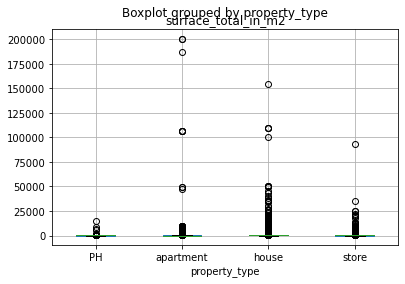

In [28]:
#Se grafican los valores para visualizar los outliers según property_type en la Data base
data.boxplot(by='property_type',column= ['surface_total_in_m2']) 

In [29]:
data = data.loc[data.condicion,:]

In [30]:
data_superficie = data.groupby(['property_type'])[['surface_total_in_m2']]
data_superficie.describe()

surface_total_in_m2                                             \
                            count        mean         std  min    25%    50%   
property_type                                                                  
PH                         4869.0   91.734648   48.681707  0.0   56.0   80.0   
apartment                 59909.0   62.259677   27.676153  0.0   42.0   55.0   
house                     31821.0  251.989881  153.180059  0.0  142.0  220.0   
store                      3234.0  170.283859  169.499001  0.0   40.0  105.0   

                             
                 75%    max  
property_type                
PH             120.0  237.0  
apartment       77.0  147.0  
house          325.0  762.0  
store          250.0  752.0

<AxesSubplot:title={'center':'surface_total_in_m2'}, xlabel='property_type'>

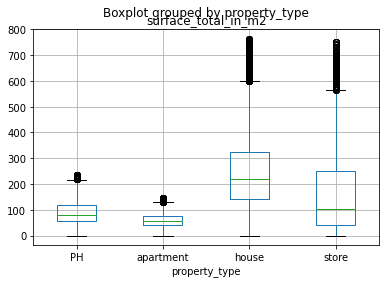

In [31]:
#Se grafican los valores para visualizar los valores luego de haber realizado la limpieza de outliers
data.boxplot(by='property_type',column= ['surface_total_in_m2']) 

In [32]:
#Se verifica cuantos datos han quedado luego de la limpieza
data.shape

(99833, 28)

In [33]:
data.head(10)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,m2_cubierto_clean,condicion
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,40.0,True
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,55.0,True
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...,35.0,True
5,5,sell,house,Gualeguaychú,|Argentina|Entre Ríos|Gualeguaychú|,Argentina,Entre Ríos,3433657.0,"-33.0140714,-58.519828",-33.014071,...,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bop_venta_depart...,"Casa en el perímetro del barrio 338, ubicada e...","Casa Barrio 338. Sobre calle 3 de caballería, ...",https://thumbs4.properati.com/6/q-w68gvaUEQVXI...,NaN,True
6,6,sell,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3430511.0,"-34.5329567,-58.5217825",-34.532957,...,1666.666667,NaN,NaN,NaN,http://www.properati.com.ar/15bor_venta_ph_mun...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",https://thumbs4.properati.com/5/6GOXsHCyDu1aGx...,78.0,True
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...,40.0,True
8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...,60.0,True
12,12,sell,apartment,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3430813.0,"-34.4860195,-58.5038139",-34.486019,...,3194.444444,NaN,NaN,NaN,http://www.properati.com.ar/15bp4_venta_depart...,EXCELENTE DEPARTAMENTO 2 AMBIENTES CONTRAFRENT...,EXCELENTE DEPARTAMENTO 2 AMBIENTES CONTRAFRENT...,https://thumbs4.properati.com/6/wgSui4rTYqPncO...,36.0,True
13,13,sell,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,3430234.0,NaN,NaN,...,3723.333333,NaN,1.0,NaN,http://www.properati.com.ar/15bp9_venta_depart...,Torre I Mondrian. 3 ambientes con terraza y d...,Vitraux Palermo,https://thumbs4.properati.com/2/ZTUjkRzTz6YvcU...,30.0,True
14,14,sell,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,3430234.0,NaN,NaN,...,4770.967742,NaN,1.0,NaN,http://www.properati.com.ar/15bpa_venta_depart...,Torre II Dalí. Ambiente unico divisible.Vitrau...,Vitraux Palermo,https://thumbs4.properati.com/8/Uay2dC732CNlRw...,31.0,True


**Se utiliza los nuevos datos de Superficie total para completar Precio USD/m2**

In [34]:
#Se crea una columna nueva para completar datos faltantes
price_usd_per_m2_clean=round(data['price_aprox_usd']/data['surface_total_in_m2'],2)
price_usd_per_m2_clean.fillna(0)

0         1127.27
2         1309.09
4         1828.57
5            0.00
6         1226.42
           ...   
121215    7699.12
121216    1383.33
121217    2858.70
121218    1997.92
121219    1675.32
Length: 99833, dtype: float64

In [35]:
data['price_usd_per_m2_clean']=price_usd_per_m2_clean

In [36]:
data.price_usd_per_m2.fillna(data.price_usd_per_m2_clean, inplace = True)

In [37]:
(data.price_usd_per_m2.isnull().sum()/data.price_usd_per_m2.shape[0]*100)

14.217743631865215

Los datos nulos han bajado de Precio de USD/m2 al 14%

**Completar Precio USD/m2 segun la media por Barrio**


In [38]:
#Se agrupa y calcula la media por property_type y place_name
#DF1= data (Original)
#DF2 = price_usd_per_m2_mean
#DF3 = price_per_m2_mean

price_usd_per_m2_mean = data.groupby(['property_type','place_name'], as_index = False)['price_usd_per_m2'].mean()
price_per_m2_mean = data.groupby(['property_type','place_name'], as_index = False)['price_per_m2'].mean()

In [39]:
display (price_usd_per_m2_mean)

,property_type,place_name,price_usd_per_m2
0,PH,Abasto,1629.325231
1,PH,Acassuso,2474.410340
2,PH,Adrogué,1865.874680
3,PH,Agronomía,3782.926332
4,PH,Aguas Verdes,545.454545
...,...,...,...
1863,store,Villa de Mayo,12500.000000
1864,store,Villa del Parque,6794.165915
1865,store,Virreyes,5142.730000
1866,store,Wilde,468.750000


In [40]:
display (price_per_m2_mean)

,property_type,place_name,price_per_m2
0,PH,Abasto,2139.904220
1,PH,Acassuso,2639.115643
2,PH,Adrogué,1969.835338
3,PH,Agronomía,3857.432482
4,PH,Aguas Verdes,1000.000000
...,...,...,...
1863,store,Villa de Mayo,12500.000000
1864,store,Villa del Parque,7395.999831
1865,store,Virreyes,5142.727840
1866,store,Wilde,468.750000


In [41]:
#Se agrega en los 3 DFs una columna concatenada de property_type y place_name para poder hacer el merge ¿?

price_per_m2_mean["Concatenado"] = price_per_m2_mean["property_type"] + " " + price_per_m2_mean["place_name"]
price_usd_per_m2_mean["Concatenado"] = price_per_m2_mean["property_type"] + " " + price_per_m2_mean["place_name"]
data["Concatenado"] = data["property_type"] + " " + data["place_name"]

In [42]:
#Se renombra columnas para evitar que coincidan los nombres con el DF original 

price_per_m2_mean.rename(columns={'price_per_m2':'price_per_m2_clean'},inplace=True)
price_usd_per_m2_mean.rename(columns={'price_usd_per_m2':'price_usd_per_m2_clean'},inplace=True)

In [43]:
#Se dropea lo que no  hace falta
df_price_per_m2_mean = price_per_m2_mean.drop(['property_type', 'place_name'], axis=1)
df_price_usd_per_m2_mean = price_usd_per_m2_mean.drop(['property_type', 'place_name'], axis=1)

In [44]:
#Se simplifica el data original para no cargar tantos datos y quedan  las col que se necesitan hacer el merge

data_2 = data.loc[:, ["Concatenado", "price_usd_per_m2","price_per_m2"]]

In [45]:
#Se realiza  el primer merge 

data_3 = data_2.merge(df_price_usd_per_m2_mean, how = 'left', left_on = 'Concatenado', right_on = 'Concatenado')

In [46]:
#Se realiza el segundo merge

data_4 = data_3.merge(df_price_per_m2_mean, how = 'left', left_on = 'Concatenado', right_on = 'Concatenado')
data_4


,Concatenado,price_usd_per_m2,price_per_m2,price_usd_per_m2_clean,price_per_m2_clean
0,PH Mataderos,1127.272727,1550.000000,1837.603516,2126.069745
1,apartment Mataderos,1309.090909,1309.090909,1990.397617,2310.660220
2,apartment Centro,1828.571429,1828.571429,1913.297733,5222.393853
3,house Gualeguaychú,NaN,NaN,916.670000,916.666667
4,PH Munro,1226.415094,1666.666667,1716.930575,1930.184797
...,...,...,...,...,...
99828,apartment Belgrano,7699.115044,9354.838710,3125.479843,8045.370411
99829,house Beccar,1383.333333,1383.333333,1546.806789,1792.094395
99830,apartment Villa Urquiza,2858.695652,3371.794872,2777.731896,8889.518568
99831,apartment Plaza Colón,1997.916667,1997.916667,1926.525327,2426.401944


In [47]:
#Se reemplazan los Nan por la media correspondiente al place name y property type
data_4.price_usd_per_m2.fillna(data_4.price_usd_per_m2_clean, inplace = True)
data_4.price_per_m2.fillna(data_4.price_per_m2_clean, inplace = True)

In [48]:
data_4

,Concatenado,price_usd_per_m2,price_per_m2,price_usd_per_m2_clean,price_per_m2_clean
0,PH Mataderos,1127.272727,1550.000000,1837.603516,2126.069745
1,apartment Mataderos,1309.090909,1309.090909,1990.397617,2310.660220
2,apartment Centro,1828.571429,1828.571429,1913.297733,5222.393853
3,house Gualeguaychú,916.670000,916.666667,916.670000,916.666667
4,PH Munro,1226.415094,1666.666667,1716.930575,1930.184797
...,...,...,...,...,...
99828,apartment Belgrano,7699.115044,9354.838710,3125.479843,8045.370411
99829,house Beccar,1383.333333,1383.333333,1546.806789,1792.094395
99830,apartment Villa Urquiza,2858.695652,3371.794872,2777.731896,8889.518568
99831,apartment Plaza Colón,1997.916667,1997.916667,1926.525327,2426.401944


In [49]:
#Se agregan las columnas con la media por property_type y place_name al DF original
data['price_usd_per_m2_clean'] = data_4["price_usd_per_m2"]
data['price_per_m2_clean'] = data_4["price_per_m2"]

In [50]:
data[["price_usd_per_m2","price_usd_per_m2_clean"]].sample(20)

,price_usd_per_m2,price_usd_per_m2_clean
9076,3157.894737,4950.000000
83923,781.591596,2309.090909
70273,1517.857143,2692.310000
11802,2116.280000,2128.375510
51186,1735.537190,966.670000
1557,NaN,inf
76385,1953.125000,1309.523810
721,NaN,299.112933
39546,NaN,2538.922973
29849,NaN,1333.333333


In [51]:
(data.price_usd_per_m2.isnull().sum()/data.price_usd_per_m2.shape[0]*100)

14.217743631865215

Los nulos price_usd_per_m2 se reducen a un 14.21%

**Conversion de Divisas**

In [52]:
#Se quiere ver cuantos precios en USD me faltan 
data["price_aprox_usd"].isnull().sum()/data.price_aprox_usd.shape[0]*100

14.217743631865215

In [53]:
data["price_aprox_usd"].isnull().sum()

14194

Luego de la limpieza de outliers vemos que los nulos de la columna price_aprox_usd han pasado de 16,83% a 14,21%

In [54]:
#Vemos cuantas divisas tiene la data

divisas = data["currency"]
divisas.value_counts()

USD    74602
ARS    11037
Name: currency, dtype: int64

Quiero pasar todos los precios de ARS a USD.

In [55]:
data["price"].isnull().sum()

14194

In [56]:
#Dado que es la misma cantidad quisiera ver si los null de price_aprox_usd tienen datos en la columna price // Como vemos todos los nulos son iguales
mask_price_usd_null = data["price_aprox_usd"].isnull()
otra_moneda = data["price"][mask_price_usd_null]
otra_moneda.isnull().sum()

14194

Como podemos ver todos los nulos de price_aprox_usd no se pueden completar con el price

#Se ha realizado el desarrollo igualmente. Se quiere pasar todos los precios de otras divisas de ARS a USD

In [57]:
#Se averigua el factor de conversion de USD a ARS.

local_price_ARS_mask = data.currency == 'ARS'
data.cotizacion = data.price_aprox_local_currency[local_price_ARS_mask]/data.price_aprox_usd

cotizacion.value_counts()

C:\Users\gonza\AppData\Local\Temp/ipykernel_15736/2199208490.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.cotizacion = data.price_aprox_local_currency[local_price_ARS_mask]/data.price_aprox_usd


NameError: name 'cotizacion' is not defined

1 USD = 17.6445 ARS

In [62]:
#Definimos la cotización como variable aparte. Vemos el tipo de dato para ver si podemos realizar la operación
cot = 17.6645
type(cot)

float

In [63]:
#Vemos el tipo de dato dentro de price_aprox_local_currency
data.price_aprox_local_currency.dtype

dtype('float64')

In [64]:
#Una vez que tengo la cotización, hago la conversion de los precios ARS a USD
#Al realizar la división me daba error, por eso convertí en array
local_price_ARS_mask = data.currency == 'ARS'
data.price_usd_conversion = np.array(data.price_aprox_local_currency[local_price_ARS_mask])/cot
print(data.price_usd_conversion)

[30811.09513431 70025.21611141 47617.14568768 ... 84142.30462226
 84422.40708766 84422.40708766]


C:\Users\gonza\AppData\Local\Temp/ipykernel_15736/2843848846.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.price_usd_conversion = np.array(data.price_aprox_local_currency[local_price_ARS_mask])/cot


In [65]:
#Completamos una nueva columna de price_usd_conversion2 rellenando los local price con las conversiones
data.price_usd_conversion2 = data.price_aprox_local_currency[local_price_ARS_mask] / data.cotizacion
data.price_usd_conversion2.round(2)
data.price_usd_conversion2[local_price_ARS_mask].head(10)

C:\Users\gonza\AppData\Local\Temp/ipykernel_15736/487569784.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.price_usd_conversion2 = data.price_aprox_local_currency[local_price_ARS_mask] / data.cotizacion


32      30846.02
37      70104.59
99      47671.12
122    145817.55
128     70104.59
130     62315.19
154     67300.41
168    140209.19
169     98707.27
174     82664.53
dtype: float64

In [66]:
#Reemplazamos los datos nulos del  price_aprox_usd
data.price_usd_conversion2.fillna(data.price_aprox_usd, inplace = True)
data.price_usd_conversion2.head(10)

0      62000.0
2      72000.0
4      64000.0
5          NaN
6     130000.0
7     138000.0
8     195000.0
12    115000.0
13    111700.0
14    147900.0
dtype: float64

In [67]:
#Verificamos si hemos reducido los nulos.
data.price_usd_conversion2.isnull().sum()

14194

Como podemos ver efectivamente no se puede completar los datos faltantes de price_aprox_usd con los datos de price. Es por ello que tomaremos el precio por m2 y los m2 para completar los datos faltantes 

In [68]:
#Verificamos cuantos datos tenemos de surface_total_in_m2 ya limpio
data["surface_total_in_m2"].isnull().sum()


0

In [69]:
data["price_usd_per_m2"].isnull().sum()

14194

In [70]:
#Dado que los nulos de price_usd_per_m2 es la misma cantidad de nulos de price_aprox_usd 
#queremos ver si son los mismos datos  
mask_price_usd_null = data["price_aprox_usd"].isnull()
per_m2_usd = data["price_usd_per_m2"][mask_price_usd_null]
per_m2_usd.isnull().sum()

14194

Conclusión: como podemos ver los nulos de price_aprox_usd tampoco se pueden rellenar con la columna price_usd_per_m2 ya que les faltan los mismos datos. Se prueba realizar la misma operación pero con la columna limpiada.

**Analisis de Rooms**

La columna Rooms tiene un 60.9% de valores faltantes.

Vamos a intentar reducir ese número mediante la  patrones usando Regex.

Contamos la cantidad de valores que tiene la columna Rooms:

In [71]:
data.rooms.value_counts()

2.0     11484
3.0     10739
1.0      6855
4.0      5885
5.0      2369
6.0       851
7.0       428
8.0       217
10.0      144
9.0       114
11.0       49
12.0       36
13.0       23
15.0       18
14.0       13
17.0       12
20.0        7
22.0        7
16.0        5
21.0        4
30.0        3
25.0        3
19.0        3
18.0        3
23.0        2
24.0        1
27.0        1
29.0        1
32.0        1
28.0        1
Name: rooms, dtype: int64

Creamos una serie de la columna Title, la cual fue seleccionada para completar la columna Rooms.

In [72]:
data_title = data['title']

Visualizamos que tipos de datos tenemos en Title:

In [73]:
data_title.value_counts()

DEPARTAMENTO EN VENTA                                       4199
CASA EN VENTA                                               2110
PH EN VENTA                                                  786
Departamento - Nueva Cordoba                                 737
Departamento - Rosario                                       582
                                                            ... 
Excelente casa venta en una planta sobre cul de sac            1
U$D 110.000 - Casa en Venta - H Irigoyen 1800     0            1
PH DE 4 DORMITORIOS Y TERRAZA- todo luz                        1
Dos Ambientes Cochera, Baulera y Amenities                     1
U$D 125.000 - Casa en Venta - Gral Jose M Paz B     1100       1
Name: title, Length: 58561, dtype: int64

Patrón para la busqueda de número de ambientes en Title:

* Numero de ambientes <numero_ambientes> como un digito (\d).
* Seguido por un espacio (\s).
* Seguido por una palabra <ambientes> que comienza con "amb".

In [74]:
pattern_ambiente = "(?P<numero_ambientes>\d)\s(?P<ambientes>amb)"
pattern_ambiente_regex = re.compile(pattern_ambiente,re.IGNORECASE)


Buscamos el patrón en Title:

In [75]:
resultado_ambientes = data_title.apply(lambda x: x if x is None else pattern_ambiente_regex.search(x))
resultado_ambientes

0          <regex.Match object; span=(0, 5), match='2 AMB'>
2          <regex.Match object; span=(0, 5), match='2 AMB'>
4         <regex.Match object; span=(6, 11), match='2 AMB'>
5                                                      None
6                                                      None
                                ...                        
121215    <regex.Match object; span=(31, 36), match='3 a...
121216                                                 None
121217                                                 None
121218     <regex.Match object; span=(0, 5), match='2 amb'>
121219                                                 None
Name: title, Length: 99833, dtype: object

Traigo solo el numero_ambientes y luego creo una máscara para las no nulas:

In [76]:
ambientes_match = resultado_ambientes.apply(lambda x: x if x is None else x.group('numero_ambientes'))
ambientes_match

0            2
2            2
4            2
5         None
6         None
          ... 
121215       3
121216    None
121217    None
121218       2
121219    None
Name: title, Length: 99833, dtype: object

In [77]:
mask_ambientes_match_notnull = ambientes_match.notnull()
mask_ambientes_match_notnull

0          True
2          True
4          True
5         False
6         False
          ...  
121215     True
121216    False
121217    False
121218     True
121219    False
Name: title, Length: 99833, dtype: bool

Aloco la nueva serie de datos en una nueva columna llamada rooms_clean y agrego los valores no nulos de rooms:

In [78]:
data.loc[mask_ambientes_match_notnull, "rooms_clean"] = ambientes_match[mask_ambientes_match_notnull]

In [79]:
len(data['rooms'])

99833

In [80]:
data.rooms_clean.fillna(data.rooms, inplace = True)

In [81]:
data[['rooms_clean','rooms']].head(20)

,rooms_clean,rooms
0,2,NaN
2,2,NaN
4,2,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
12,2,NaN
13,1,1.0
14,1,1.0


In [82]:
(data.rooms_clean.isnull().sum()/data.rooms_clean.shape[0]*100)
        

53.37914316909238

**Conclusión - Columna Rooms**

La busqueda de valores mediante patrones para completar la columna rooms solo redujo del 59.9% al 53.4% el porcentaje de valores nulos.

El indicador sigue siendo demasiado alto para poder realizar un análisis representativo de la columna.

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99833 entries, 0 to 121219
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  99833 non-null  int64  
 1   operation                   99833 non-null  object 
 2   property_type               99833 non-null  object 
 3   place_name                  99812 non-null  object 
 4   place_with_parent_names     99833 non-null  object 
 5   country_name                99833 non-null  object 
 6   state_name                  99833 non-null  object 
 7   geonames_id                 84045 non-null  float64
 8   lat-lon                     56227 non-null  object 
 9   lat                         56227 non-null  float64
 10  lon                         56227 non-null  float64
 11  price                       85639 non-null  float64
 12  currency                    85639 non-null  object 
 13  price_aprox_local_currency  85

In [84]:
(data.isnull().sum()/data.shape[0]*100).sort_values(ascending=False)

floor                         93.031362
expenses                      87.384933
rooms                         60.655294
rooms_clean                   53.379143
lat-lon                       43.678944
lat                           43.678944
lon                           43.678944
price_per_m2                  19.348312
price_per_m2_clean            18.061162
price_usd_per_m2_clean        17.881863
geonames_id                   15.814410
price_aprox_usd               14.217744
price_usd_per_m2              14.217744
price_aprox_local_currency    14.217744
currency                      14.217744
price                         14.217744
m2_cubierto_clean              7.031743
surface_covered_in_m2          7.031743
image_thumbnail                2.336903
Concatenado                    0.021035
place_name                     0.021035
description                    0.001002
operation                      0.000000
country_name                   0.000000
property_type                  0.000000


**CONCLUSIONES DE LIMPIEZA DE VALORES NULOS EN EL DATA SET**

Podemos observar las siguiente mejores en nuestra Data:
**Variable Precio**
Los nulos de la columna price_usd_per_m2_clean han bajado del 43,39% al 17,88% se pudo completar más información.
Los nulos de la columna price_aprox_usd han bajado del 16,83% al 14,21% en este caso no se pudo completar más información pero se redujo gracias a la eliminación de outliers en m2.

**Variable Tamaño**: 
La columna surface_total_in_m2 que contaba con el 32.44% de sus datos en nulos ya no tiene nulos. 
La columna surface_covered_in_m2 se ha reducido del 16,42% al 7,03% 
La columna rooms si bien se pudo reducir de 59.9% al 53.4%, debido al gran nº de datos faltantes no se usará.

**Variable Altura**: Columna floor por el momento no completaremos esta columna ya que nos falta el 93.48% de los datos



**EXTRA - Analisis CAPITAL FEDERAL:**

**Se realizara un estudio con una comparacion de propiedades entre Palermo y Belgrano para un potencial comprador**.

**1. Se compara precios de USD/m2 en Palermo vs Belgrano**

In [85]:
mask_capitalfederal = data['state_name'] == 'Capital Federal'
capital_federal = data.loc[mask_capitalfederal,:]


In [86]:
mask_palermo=capital_federal.place_name=='Palermo' 
mask_belgrano=capital_federal.place_name=='Belgrano'
mask_palermo_o_belgrano = mask_belgrano | mask_palermo
palermo_o_belgrano = capital_federal[mask_palermo_o_belgrano]

In [87]:
grupo = round(palermo_o_belgrano.groupby(['place_name'], as_index =False)['price_usd_per_m2'].mean(),2)
grupo.sort_values(by= ['price_usd_per_m2'], ascending=False)

,place_name,price_usd_per_m2
1,Palermo,3580.39
0,Belgrano,3160.68


In [88]:
import seaborn as sns

<AxesSubplot:xlabel='place_name', ylabel='price_usd_per_m2'>

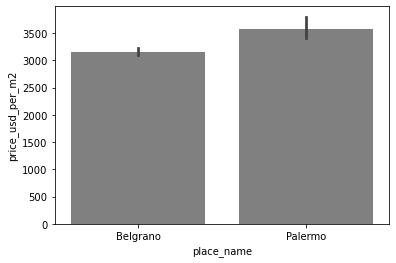

In [89]:
sns.barplot(x=palermo_o_belgrano['place_name'], y=palermo_o_belgrano['price_usd_per_m2'], color='grey')

In [90]:
#CSuperficie total promedio en cada barrio
round(palermo_o_belgrano.groupby(['place_name'])[['surface_total_in_m2']].mean(),2)

,surface_total_in_m2
place_name,
Belgrano,81.68
Palermo,77.18


In [91]:
#Cantidad de propiedades en venta en cada barrio
palermo_o_belgrano.groupby(['place_name'])[['operation']].count()

,operation
place_name,
Belgrano,2482
Palermo,2463


In [92]:
#Juntar en un grafico el precio de venta, la superficie promedio y la cantidad de propiedades en venta para cada uno de los barrios

Visualizo que cantidad de datos tiene cada barrio de Capital Federal utilizando la columna place_with_parent_names:

### TP2

---

Fue elegido como dataset a analizar Departamentos en Palermo por la cantidad de datos disponibles.

In [93]:
mask_capitalfederal = data['state_name'] == 'Capital Federal'
capital_federal = data.loc[mask_capitalfederal,:]


In [94]:
mask_palermo=capital_federal.place_name=='Palermo' 
mask_apartment=capital_federal.property_type =='apartment'
mask_palermo_apartments = mask_apartment & mask_palermo
palermo_apartments = capital_federal[mask_palermo_apartments]

In [95]:
palermo_apartments_clean = palermo_apartments[['surface_total_in_m2','price_aprox_usd']]

In [96]:
palermo_apartments_clean.shape

(2203, 2)

In [97]:
palermo_apartments_clean.head(5)

,surface_total_in_m2,price_aprox_usd
19,104.0,350000.0
21,118.0,270500.0
241,39.0,147300.0
386,70.0,179000.0
444,43.0,95000.0


In [98]:
palermo_apartments_clean.dropna(inplace = True)


C:\Users\gonza\AppData\Local\Temp/ipykernel_15736/4229900191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  palermo_apartments_clean.dropna(inplace = True)


In [99]:
palermo_apartments_clean['surface_total_in_m2'].isnull().sum()

0

In [100]:
palermo_apartments_clean["price_aprox_usd"].isnull().sum()

0

**CORRELACION DE VARIABLES**

<AxesSubplot:>

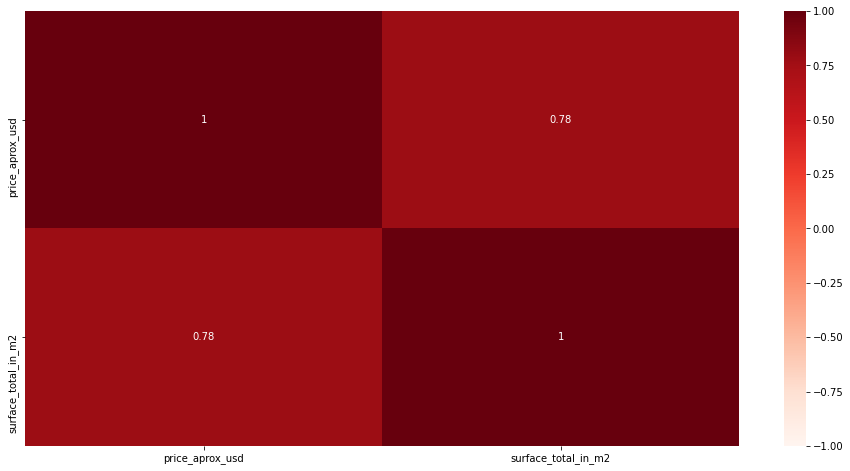

In [101]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 8)
sns.heatmap(palermo_apartments_clean[['price_aprox_usd','surface_total_in_m2']].corr(), annot=True,vmin=-1, cmap='Reds')

**REGRESION LINEAL**

---

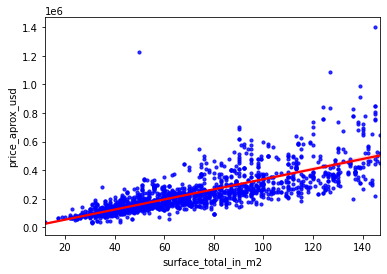

In [102]:
g=sns.regplot(data = palermo_apartments_clean, x = "surface_total_in_m2", y = "price_aprox_usd", 
            ci = 95,
            scatter_kws = {"color": "blue", 's': 10},
            line_kws = {"color": "red"}); 
#ylabels = ['{:,.2f}'.format(x) + 'K' for x in g.get_xticks()/1000]
#g.set_yticklabels(ylabels)
#ARREGLAR ESCALA GRAFICO EN EJE Y

In [103]:
palermo_apartments_clean.price_aprox_usd.describe()

count    1.908000e+03
mean     2.231412e+05
std      1.383647e+05
min      3.343159e+04
25%      1.300000e+05
50%      1.800000e+05
75%      2.709375e+05
max      1.400000e+06
Name: price_aprox_usd, dtype: float64

In [104]:
# Pongo el target en otro Dataframe
targets = pd.DataFrame(palermo_apartments_clean.price_aprox_usd, columns=["price_aprox_usd"])
targets.head(5)

,price_aprox_usd
19,350000.0
21,270500.0
241,147300.0
386,179000.0
444,95000.0


C:\Users\gonza\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='surface_total_in_m2', ylabel='Density'>

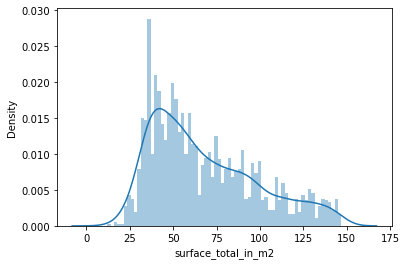

In [105]:
sns.distplot(palermo_apartments_clean["surface_total_in_m2"], bins=70)

C:\Users\gonza\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_aprox_usd', ylabel='Density'>

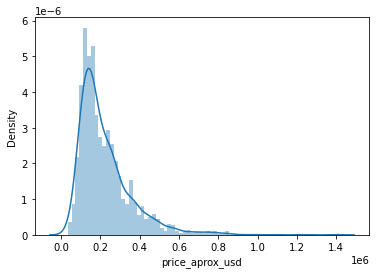

In [106]:
sns.distplot(palermo_apartments_clean["price_aprox_usd"], bins=70)

In [107]:
palermo_apartments_clean["price_aprox_usd"].isnull().sum()

0

In [108]:
palermo_apartments_clean["price_aprox_usd"].isnull().sum()

0

In [109]:
palermo_apartments_clean[["surface_total_in_m2"]].isnull().sum()

surface_total_in_m2    0
dtype: int64

In [110]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split

In [122]:
# Seleccionamos la variable predictora y la objetivo.
X = palermo_apartments_clean[["surface_total_in_m2"]]
y = targets["price_aprox_usd"]

# Estandarizamos variable dependiente
#standard = preprocessing.scale(X)

# Instanciamos el modelo.
#lm = linear_model.LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=10)

#Ajustamos el modelo a los datos de entrenamiento
model= lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)
r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, lm.predict(X_train))

print(f"R2 train: {r2_train}")
print(f"R2 test: {r2_test}")



#ypred = lm.predict(Xtest)
#
# Guardamos  las predicciones en un nuevo vector que llamaremos predictions.
#predictions = lm.predict(X)

# Imprimimos el intercepto y los coeficientes como atributos del objeto entrenado.
print ('Intercepto=', ' ', model.intercept_)
print ('Superficie=', ' ', model.coef_)
# imprimos la metrica que mide la bondad de ajusto del modelo. En este caso el R2.
print ('R2_train=', ' ', model.score(X, y))


R2 train: 0.6174869803256845
R2 test: 0.5935302109641928
Intercepto=   -14383.570641759783
Superficie=   [3478.77912578]
R2_train=   0.6106037216666489


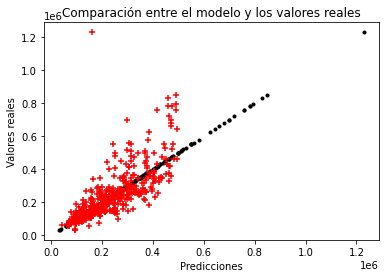

In [131]:
plt.plot(y_test,y_test, '.',c='black')
plt.scatter(y_pred, y_test, s=30, c='r', marker='+', zorder=50)
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.title('Comparación entre el modelo y los valores reales')
plt.show()

**Conclusiones**
- El valor de las propiedades (eje X) nunca vale cero, es por eso que el numero da tan bajo.
- Que el valor de R2 Train y Test sea tan cercano, quiere decir que no se demuestran a primera vista grandes problemas de generalizacion de datos.
- R2 = 0.6 es un buen valor de bondad de ajuste del modelo.